In [ ]:
# 使用 yfinance 套件取得股票資料
import yfinance as yf
ticker = "2330.TW"  
start_date = "2023-02-19" # <------------------------起訖時間
end_date   = "2023-05-19"  #<---------------------------
stock_data = yf.download(ticker, start=start_date, end=end_date)
print(stock_data[-10:])

[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2023-05-05  500.0  502.0  498.5  500.0      500.0   7488897
2023-05-08  509.0  509.0  502.0  504.0      504.0  11243634
2023-05-09  507.0  510.0  505.0  510.0      510.0  16197743
2023-05-10  508.0  508.0  500.0  503.0      503.0  18859212
2023-05-11  506.0  506.0  498.5  499.0      499.0  13382927
2023-05-12  496.0  500.0  495.0  496.0      496.0  18465362
2023-05-15  497.0  499.5  494.5  495.5      495.5  13315766
2023-05-16  503.0  508.0  500.0  505.0      505.0  21140315
2023-05-17  508.0  521.0  506.0  519.0      519.0  41406763
2023-05-18  533.0  536.0  526.0  530.0      530.0  43096277


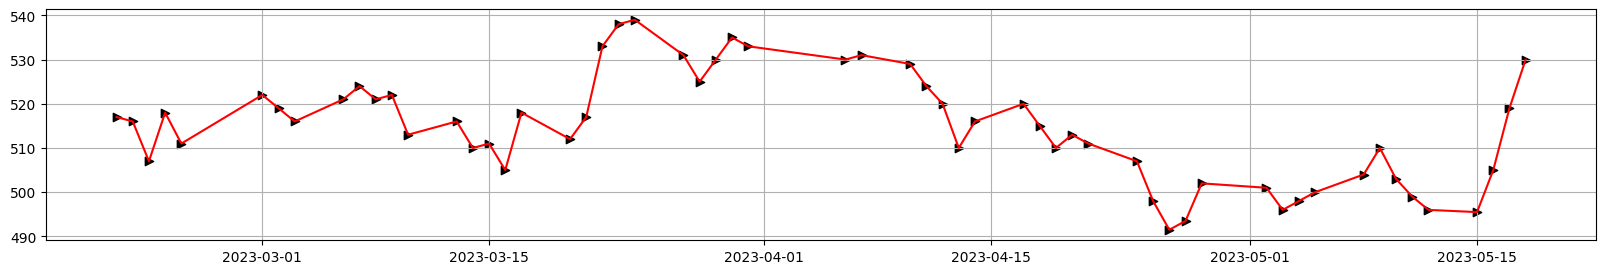

In [ ]:
import matplotlib.pyplot as plt # 使用繪圖套件
plt.figure(figsize=(20,3))      # 設定圖框大小 20 吋:左右 3吋:上下
plt.scatter(stock_data.index, stock_data.Close, marker='>', color='black')              # scatter 點狀圖
plt.plot(stock_data.index, stock_data.Close, color='red')                               # 各點連線
plt.grid()
plt.show()

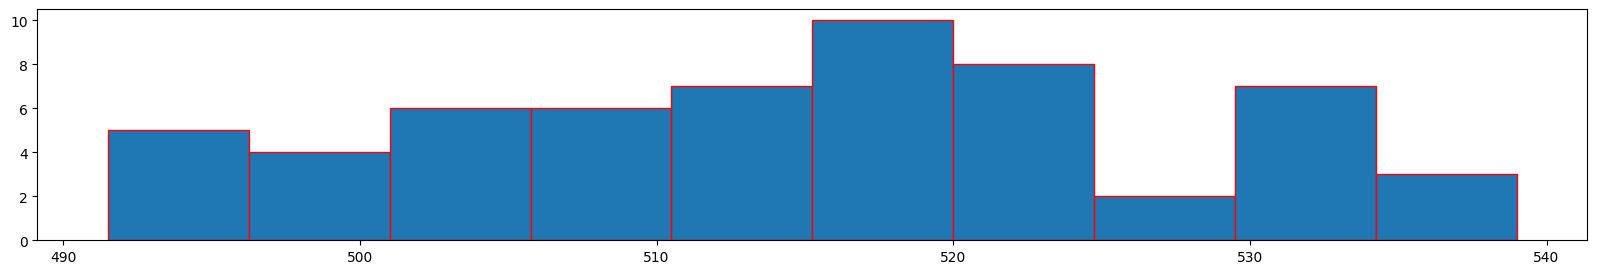

In [ ]:
# hist
import matplotlib.pyplot as plt           # 使用繪圖套件
plt.figure(figsize=(20,3))               # 設定圖框大小 20 吋:左右 3吋:上下
plt.hist(stock_data.Close, edgecolor='red')        # histgram
plt.show()

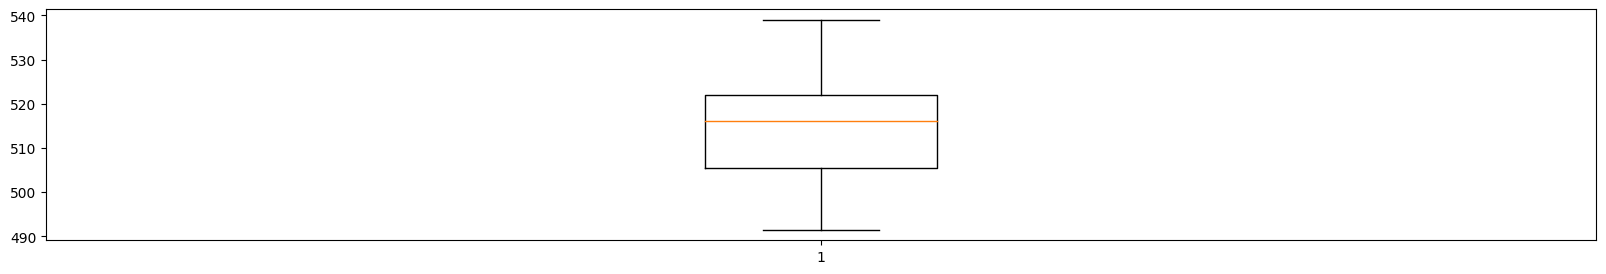

In [ ]:
# boxplot
import matplotlib.pyplot as plt           # 使用繪圖套件
plt.figure(figsize=(20,3))               # 設定圖框大小 20 吋:左右 3吋:上下
plt.boxplot(stock_data.Close)                # histgram
plt.show()

In [ ]:
# 抓出價格最高日資料
stock_data[stock_data.Close ==stock_data.Close.max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-24,536.0,539.0,535.0,539.0,539.0,21926240


In [ ]:
# 抓出成交量最大日資料
stock_data[stock_data.Volume ==stock_data.Volume.max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-18,533.0,536.0,526.0,530.0,530.0,43096277


In [ ]:
# 使用機器學習模型預測 TSMC股價  ＃code參考
import numpy as np
# split a univariate sequence into samples X, y
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
# 根據每10天預設下一天
X,  y = split_sequence(stock_data.Close.to_list(), 10)
X[-3:], y[-3:], stock_data.Close[-10:]

(array([[501. , 496. , 498. , 500. , 504. , 510. , 503. , 499. , 496. ,
         495.5],
        [496. , 498. , 500. , 504. , 510. , 503. , 499. , 496. , 495.5,
         505. ],
        [498. , 500. , 504. , 510. , 503. , 499. , 496. , 495.5, 505. ,
         519. ]]),
 array([505., 519., 530.]),
 Date
 2023-05-05    500.0
 2023-05-08    504.0
 2023-05-09    510.0
 2023-05-10    503.0
 2023-05-11    499.0
 2023-05-12    496.0
 2023-05-15    495.5
 2023-05-16    505.0
 2023-05-17    519.0
 2023-05-18    530.0
 Name: Close, dtype: float64)

In [ ]:
# TSMC 模型
from sklearn.linear_model import LinearRegression # 線性迴歸分析
from sklearn.linear_model import Ridge # Ridge
from sklearn.linear_model import Lasso # Lasso
                                       # RANSACRegressor <----------- 使用此演算法
# model_tw =  Ridge() # Ridge
# model_tw =  LinearRegression()  # 線性迴歸分析
model_tw = Lasso()
model_tw.fit(X, y)
model_tw.score(X, y)

0.818371925705676

In [ ]:
# 練習：根據上述的MODEL，預測下10個交易日期

y_next = y.copy()
next_days = 50 #<------------------------------------------------預測下幾天
for i in range(next_days):
    pred_next = model_tw.predict(y_next[-10:].reshape(1, -1))     
    #print('Next',i+1, pred_next )    
    y_next = np.append(y_next, pred_next)    
y_next[-10:], len(y_next)

(array([517.5224877 , 517.46304139, 517.34713369, 517.19157039,
        517.01088337, 516.81699292, 516.62435132, 516.44616882,
        516.28750238, 516.14443516]),
 98)

48


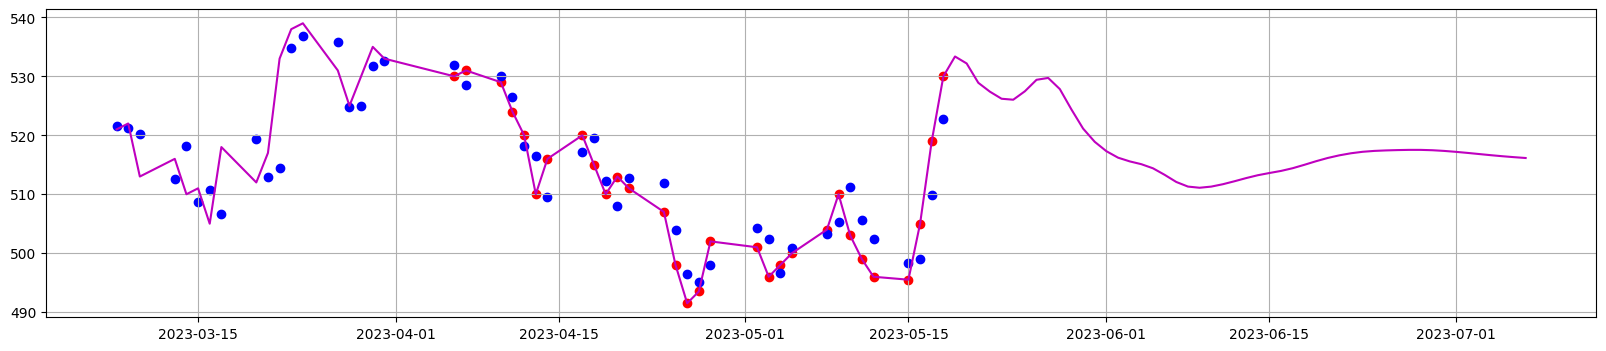

In [ ]:
# Time Series 數據分析
last = -30
# 預測的股價
y_pred = model_tw.predict(X)
print(len(y_pred))
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
plt.scatter(stock_data.index[last:], stock_data['Close'][last:], color='red')
plt.scatter(stock_data.index[-1*len(y_pred):], y_pred, color='blue')
plt.plot( np.append(stock_data.index[-1*len(y_pred):],pd.date_range(stock_data.index[-1], periods=next_days+1)[-1*next_days:]), y_next,color='m')
plt.grid()
plt.show()